## Excercise - AMON data

**Task:** 
Visualize the time series of AMON (Airglow MONitor) data

**Steps:**
- import libraries
- load data and process them
- plot data (keep in mind qualities of good data visualization)

**Bonus:**
- play with ranges, rolling mean interval, and etc. to catch the airglow variability
- create histograms for time 21:00 - 22:00 and 22:00 - 23:00 and compare them
- create boxplot with boxes for each 10 minutes
- identify and remove data contaminated by Sun light (hint: use PyEphem)

In [1]:
## import libraries

import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as md

In [2]:
## load data and process them

# load data to Pandas Data Frame
amon_file = 'https://github.com/space-lab-sk/amon-es/raw/develop/data_samples/amon01_20200521_2100-20200522_0300.txt'
dfa = pd.read_fwf(amon_file, names=['amon_date', 'amon_time', 'amon_data'], skiprows=1, na_values='x')
dfa.head()

# join date and time
dfa.amon_time = pd.to_datetime(dfa.amon_date.astype(str)+' '+dfa.amon_time.astype(str))
dfa.drop(['amon_date'], axis=1, inplace=True)
dfa.set_index('amon_time', inplace=True)
print('Head of AMON data frame')
print(dfa.head())

# calculate the rolling mean and store it to ne DF
dfar = dfa.rolling(window=300).mean()
print('\nTail of averaged AMON data frame')
print(dfar.tail())

Head of AMON data frame
                     amon_data
amon_time                     
2020-05-21 21:00:00      198.0
2020-05-21 21:00:01      179.0
2020-05-21 21:00:02      163.0
2020-05-21 21:00:03      143.0
2020-05-21 21:00:04      164.0

Tail of averaged AMON data frame
                     amon_data
amon_time                     
2020-05-22 02:59:55   0.023333
2020-05-22 02:59:56   0.023333
2020-05-22 02:59:57   0.020000
2020-05-22 02:59:58   0.020000
2020-05-22 02:59:59   0.020000


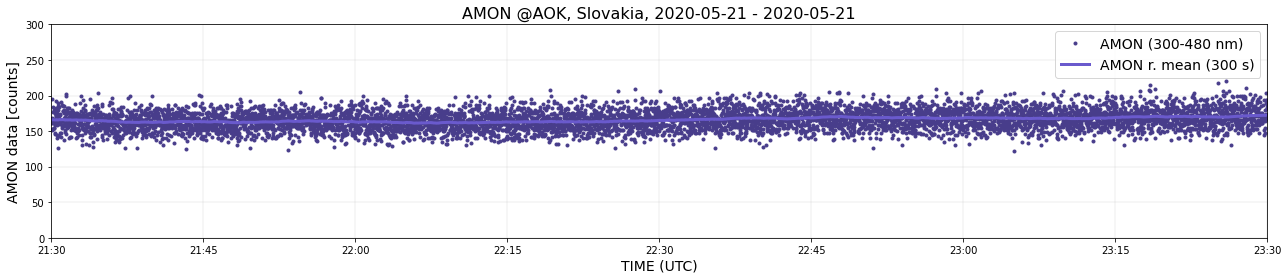

In [3]:
## plot data

# select desired time interval
start_time = datetime.datetime.strptime('2020-05-21 21:30', "%Y-%m-%d %H:%M")
end_time = datetime.datetime.strptime('2020-05-21 23:30', "%Y-%m-%d %H:%M")

# Plot data frame of AMON data (dfa)
plt.figure(figsize=(18, 4))
plt.title('AMON @AOK, Slovakia, ' + str(start_time)[:10] + ' - ' + str(end_time)[:10], fontsize=16)
plt.xlabel('TIME (UTC)', fontsize=14)
plt.ylabel('AMON data [counts]', fontsize=14)
plt.xlim(start_time, end_time)
plt.ylim(0, 300)
ax = plt.gca()
xfmt = md.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(xfmt)
plt.plot(dfa.index, dfa.amon_data, '.', color='darkslateblue', label='AMON (300-480 nm)')
plt.plot(dfar.index, dfar.amon_data, color='slateblue', label='AMON r. mean (300 s)', linewidth=3)
plt.legend(loc='upper right', fontsize=14)
plt.tight_layout()
plt.grid(linewidth=0.2)
plt.show()

In [4]:
## BONUS:

# write your code here